<a href="https://colab.research.google.com/github/ravanlankesh/Machine-Learning/blob/master/EEG_IITR_Imagined_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 4.5 MB/s 


In [49]:
import mne
import matplotlib.pyplot as plt 
import numpy as np
# import os
import seaborn as sns
import mne
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Input
   


Below are the class_typees present in database and also one example of EEG signal generated for particular person for particular object.

Out of 20 text
classes, 10 slides are of digits from 0–9, whereas the rest
of the slides consist of 10 character images. A pictorial
representation of 20 text classes is depicted in Fig.

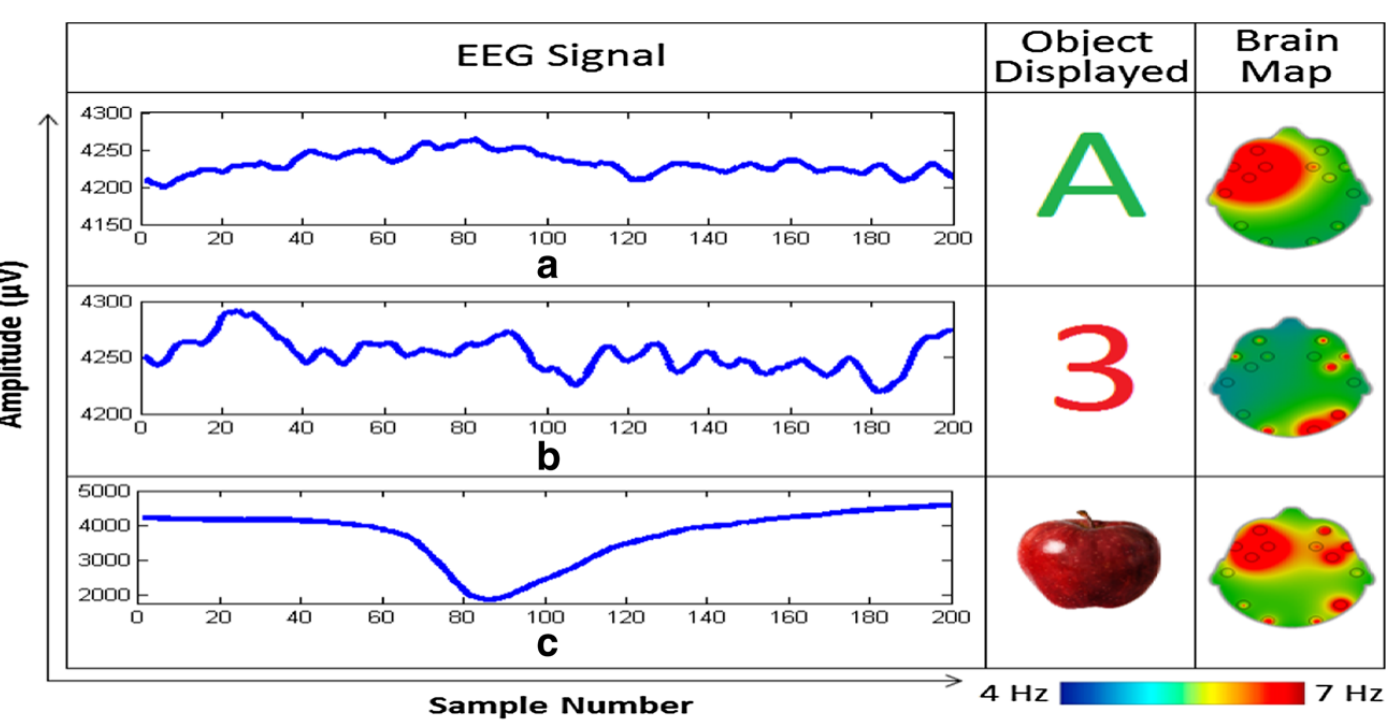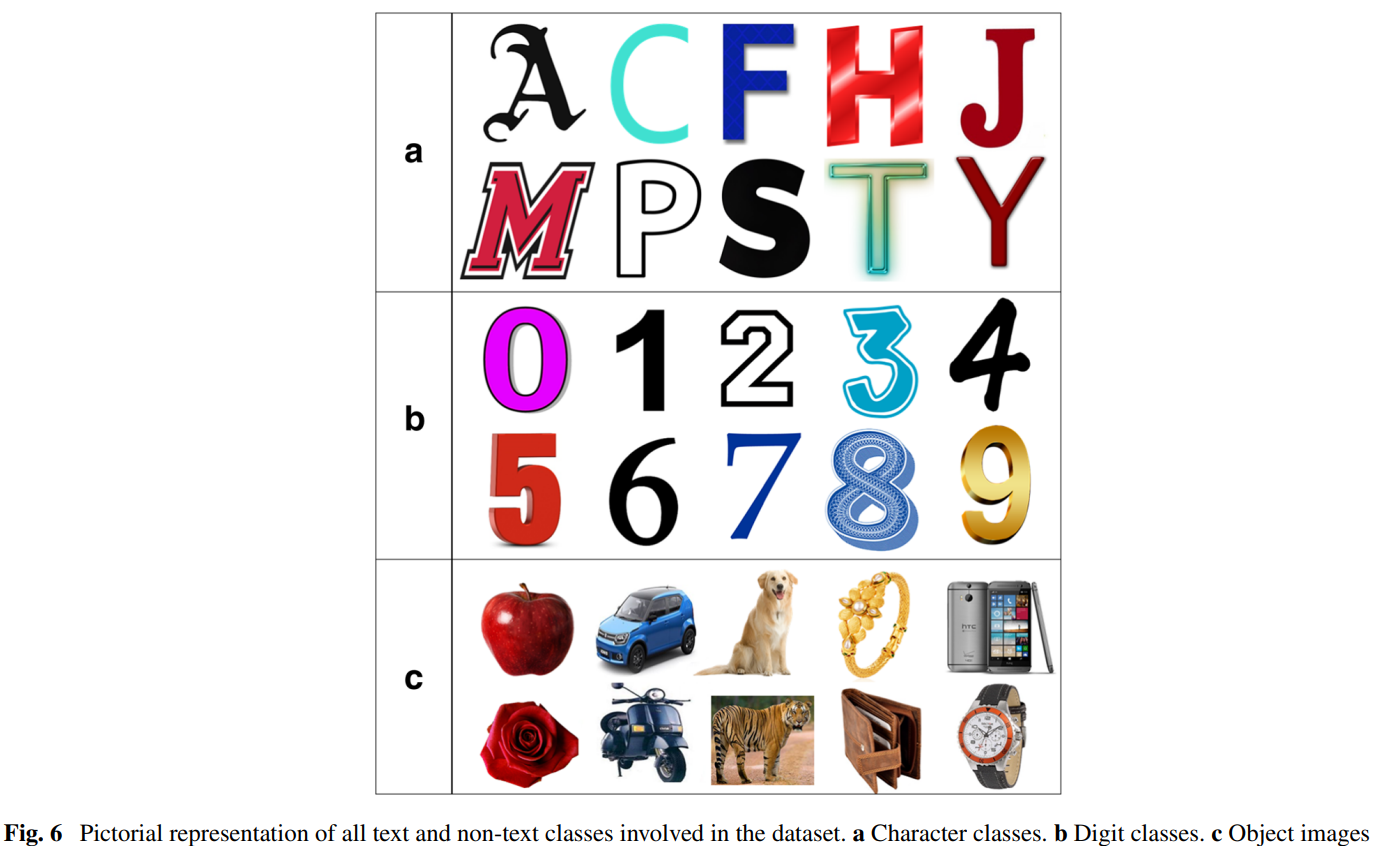

Reading the EDF files

MNE has been used to read the edf file. We cannot read the edf file the way we read any csv to excel file in python, MNE provide the functionality to read the files related to the M/EEG datasets specially

# READING the image,char,digit file for **aashay**

In [3]:
raw_image = mne.io.read_raw_edf('/content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf')
# fname = "aashay_Apple.edf"

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [4]:
raw_image

<RawEDF | aashay_Apple.edf, 39 x 1536 (12.0 s), ~42 kB, data not loaded>

 READING the char file for **aashay**

In [5]:
raw_char = mne.io.read_raw_edf('/content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf')

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [6]:
raw_char

<RawEDF | aashay_Apple.edf, 39 x 1536 (12.0 s), ~42 kB, data not loaded>

 READING the digit file for **aashay**

In [7]:
raw_digit = mne.io.read_raw_edf('/content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf')

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Image/aashay_Apple.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [8]:
raw_digit

<RawEDF | aashay_Apple.edf, 39 x 1536 (12.0 s), ~42 kB, data not loaded>

# Vipin_char data

In [9]:
#preload will load the data, by default preload = False and hence data will not be loaded
raw_char_vipin = mne.io.read_raw_edf('/content/drive/MyDrive/EEGdataset/Char/Vipin_P.edf',preload = True)

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Char/Vipin_P.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1663  =      0.000 ...    12.992 secs...





*   **set_eeg_reference** : This function will re-reference the data according to the desired reference.[for more info](https://mne.tools/dev/generated/mne.set_eeg_reference.html)
*   **filter**() : filters data based on frequency, bandwidth, length , etc[for more info](https://mne.tools/stable/generated/mne.Epochs.html?highlight=get_data#mne.Epochs.filter)
*   **mne.make_fixed_length_epochs()** :Divide continuous raw data into equal-sized consecutive epochs.[for more info](https://mne.tools/dev/generated/mne.make_fixed_length_epochs.html)
*   **epochs.get_data()** : Get all epochs as a 3D array.[for more info](https://mne.tools/stable/generated/mne.Epochs.html?highlight=get_data#mne.Epochs.get_data)





In [10]:
raw_char_vipin.set_eeg_reference()
raw_char_vipin.filter(l_freq= 0.5 , h_freq = 40)
epochs = mne.make_fixed_length_epochs(raw_char_vipin,duration=2,overlap=0)
array_vipin = epochs.get_data()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (6.602 sec)

Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 256 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished


Below we can se that the shape is (8,39,256) here the shape is dependent on the segmentation/epochs of EEG signal. Here I have used **duration = 2sec** and **overlap = 0.5**

so total of 8 segments are created as shown below based on time frame

*   first segment : 0-2
*   Second segment : 1.5-3.5
*   third segment : 3-5
*   fourth segment : 4.5-6.5
*   fifth segment : 6-8
*   sixth segment : 7.5-9.5
*   seventh segment : 9-10
*   eighth segment : 9.5-10

In [11]:
array_vipin

array([[[-5.79370536e-19, -4.15421265e-06,  1.80218300e-06, ...,
          4.50665796e-05,  4.40350389e-05,  4.83330505e-05],
        [-2.55803950e-19, -5.33293591e-06, -1.31445279e-06, ...,
          1.28248237e-06, -7.41274250e-07,  2.66998827e-06],
        [ 6.25110315e-19,  1.44166666e-05,  8.63151146e-06, ...,
          4.75817800e-06,  3.14457443e-06,  1.30718550e-05],
        ...,
        [-3.87941090e-19, -5.35567288e-06, -1.35992509e-06, ...,
          1.19961131e-06, -8.24647394e-07,  2.58615368e-06],
        [-5.11607900e-19, -5.36590369e-06, -1.36831357e-06, ...,
          1.20393614e-06, -8.21057395e-07,  2.58902562e-06],
        [-4.15046144e-19, -5.35953641e-06, -1.37803784e-06, ...,
          1.15866814e-06, -8.65459957e-07,  2.54548304e-06]],

       [[ 4.85479834e-05,  4.40246006e-05,  4.49059168e-05, ...,
          4.40839083e-05,  4.83267895e-05,  4.64533961e-05],
        [ 1.92784142e-06, -3.78214283e-06, -3.63865832e-06, ...,
          4.01545005e-06,  7.26118455e

Each segment will be of size (39,256)
**39 -> denotes Good channel** 

In [12]:
array_vipin[0].shape

(39, 256)

# label_Extraction

In [13]:
from glob import glob
import numpy as np

In [14]:
file_path = glob('/content/drive/MyDrive/EEGdataset/Digit/*.edf')

In [15]:
%%capture
file_path

In [16]:
label = []
for i in file_path:
  part = i.split('_')
  label.append(int(part[1].split('.')[0]))

In [17]:
digit_label = np.array(label)

In [18]:
type(digit_label)

numpy.ndarray

# fetching data

In [19]:
def read_data(file_path):
  data_x = mne.io.read_raw_edf(file_path,preload = True)
  data_x.set_eeg_reference()
  data_x.filter(l_freq= 0.5 , h_freq = 40)
  epochs = mne.make_fixed_length_epochs(data_x,duration = 10)
  array = epochs.get_data()
  return array

In [20]:
#this will avoid Print very long data
%%capture 
digit_data = [read_data(i) for i in file_path]

In [21]:
len(digit_data)

230

In [22]:
temp = np.array(digit_data)
temp.shape

(230, 1, 39, 1280)

In [23]:
x = []
# print(x.shape)
for i in range(len(digit_data)):
  x.append(digit_data[i])
print(digit_data[0])

[[[-5.96311195e-19 -3.64666615e-06 -3.52112053e-06 ...  4.27644962e-05
    4.14808146e-05  4.31238918e-05]
  [-1.99899776e-19 -4.18422983e-06 -4.59628284e-06 ... -1.77233444e-05
   -1.89124003e-05 -1.46849682e-05]
  [ 7.42000862e-19 -2.69117378e-06  6.76793776e-06 ... -9.39019638e-06
   -1.93007904e-05 -1.85819225e-05]
  ...
  [-3.18484388e-19 -4.07042633e-06 -4.84065456e-06 ... -1.77233444e-05
   -1.89124003e-05 -1.46849682e-05]
  [-1.54159996e-19 -4.20479145e-06 -4.63740482e-06 ... -1.77233444e-05
   -1.89124003e-05 -1.46849682e-05]
  [-2.38863291e-19 -4.21151743e-06 -4.65085638e-06 ... -1.77233444e-05
   -1.89124003e-05 -1.46849682e-05]]]


In [24]:
x_data = np.array(x)
x_data.shape

(230, 1, 39, 1280)

In [25]:
digit_label.shape

(230,)

# Convolution Neural Networks

In [40]:
X = np.zeros((230,39,1280))
Y = np.zeros((230,))
file_ptr = 0# to keep the track of every file 
for fi in file_path:
    data = mne.io.read_raw_edf(fi)
    raw_data = data[0:39][0]
    raw_data = raw_data[:,0:1280]
    #classes extraction from files using split
    _,cls = fi.split('_')
    Y[file_ptr] = int(cls[0])
    X[file_ptr,:,:] = raw_data
    file_ptr = file_ptr+1

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_8.edf...
EDF file detected
Setting channel info structure...
Creat

In [54]:
# print(X[0])
# print("------------")
# print(X[0,:,:])
len(X[0][0])

1280

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
i1 = Input(shape=(39,1280))
x1 = BatchNormalization()(i1)
x1 = Conv1D(128, kernel_size=10,strides=1,activation='relu',padding='same')(x1)
x1 = MaxPooling1D(2)(x1)
x1 = Conv1D(128, kernel_size=10,strides=1,activation='relu',padding='same')(x1)
x1 = MaxPooling1D(2)(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
output = Dense(10, activation='softmax')(x1)


In [43]:
model = Model(inputs=i1, outputs=output)# summarize layers
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [44]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 39, 1280)]        0         
                                                                 
 batch_normalization_2 (Batc  (None, 39, 1280)         5120      
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 39, 128)           1638528   
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 19, 128)           163968    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 9, 128)           0   

In [45]:
model.fit(X_train, y=to_categorical(Y_train),validation_split=0.2,epochs=100, batch_size=128)


Epoch 1/100
2/2 [==============================] - 3s 604ms/step - loss: 2.3626 - accuracy: 0.1088 - val_loss: 2.3009 - val_accuracy: 0.0541
Epoch 2/100
2/2 [==============================] - 2s 394ms/step - loss: 2.6981 - accuracy: 0.0680 - val_loss: 2.3013 - val_accuracy: 0.0811
Epoch 3/100
2/2 [==============================] - 2s 352ms/step - loss: 2.4773 - accuracy: 0.1088 - val_loss: 2.3029 - val_accuracy: 0.0811
Epoch 4/100
2/2 [==============================] - 2s 395ms/step - loss: 2.3656 - accuracy: 0.1088 - val_loss: 2.3038 - val_accuracy: 0.0811
Epoch 5/100
2/2 [==============================] - 2s 368ms/step - loss: 2.3183 - accuracy: 0.1156 - val_loss: 2.3031 - val_accuracy: 0.0811
Epoch 6/100
2/2 [==============================] - 2s 357ms/step - loss: 2.3398 - accuracy: 0.1156 - val_loss: 2.3025 - val_accuracy: 0.0811
Epoch 7/100
2/2 [==============================] - 2s 412ms/step - loss: 2.3164 - accuracy: 0.1293 - val_loss: 2.3032 - val_accuracy: 0.0811
Epoch 8/100
2

In [46]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred,axis=1)
print(accuracy_score(Y_pred,Y_test))


0.043478260869565216


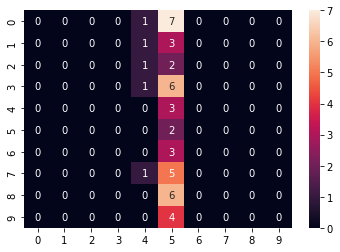

In [50]:
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True,fmt='g')

# CNN & Data Fetchcing

In [ ]:
X = np.zeros((230,14,1280))
Y = np.zeros((230,))
file_ptr = 0# to keep the track of every file 
for fi in file_path:
    data = mne.io.read_raw_edf(fi)
    raw_data = data[2:16][0]*1000
    raw_data = raw_data[:,0:1280]
    #classes extraction from files using split
    _,cls = fi.split('_')
    Y[file_ptr] = int(cls[0])
    X[file_ptr,:,:] = raw_data
    file_ptr = file_ptr+1

Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEGdataset/Digit/pradeep_8.edf...
EDF file detected
Setting channel info structure...
Creat

In [ ]:
X_new = np.zeros((36110,32,14))
Y_new = np.zeros((36110,))
npt = 32
stride = 8
ctr = 0
for i in range(0,230):
    y = Y[i]
    a= X[i,:,:]
    a = a.transpose()
    val = 0
    while val<=(len(a)-npt):
        x = a[val:val+npt,:]
        X_new[ctr,:,:] = x
        Y_new[ctr] = y
        val = val+stride
        ctr = ctr+1

# Convolution Neural Networks

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=1)
i1 = Input(shape=(32,14))
x1 = BatchNormalization()(i1)
x1 = Conv1D(128, kernel_size=10,strides=1,activation='relu',padding='same')(x1)
x1 = MaxPooling1D(2)(x1)
x1 = Conv1D(128, kernel_size=10,strides=1,activation='relu',padding='same')(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
output = Dense(10, activation='softmax')(x1)


In [ ]:
model = Model(inputs=i1, outputs=output)# summarize layers
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 14)]          0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 14)           56        
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 128)           18048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 16, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 16, 128)           163968    
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0     

In [ ]:
model.fit(X_train, y=to_categorical(Y_train),validation_split=0.2,epochs=250, batch_size=128)


Epoch 1/250
181/181 [==============================] - 24s 127ms/step - loss: 2.2838 - accuracy: 0.1211 - val_loss: 5.0628 - val_accuracy: 0.1035
Epoch 2/250
 99/181 [===============>..............] - ETA: 18s - loss: 2.2443 - accuracy: 0.1517

KeyboardInterrupt: ignored

In [ ]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred,axis=1)
print(accuracy_score(Y_pred,Y_test))
